This notebook gives an over view of various classification algorithm used in Machine Learning on Titanic dataset

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
#get the dataset
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I will be using age and sex to classify whether the person might have survived or not! According to theories, children and women were saved first and then the males of elight families had more chances of survival

In [4]:
data_survival_gender = dataset[['Age', 'Sex', 'Survived']]

In [5]:
#split the dataset into X and y
X = data_survival_gender.iloc[:, :-1].values
y = data_survival_gender.iloc[:, -1].values

In [6]:
#Handling missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values= 'NaN', strategy='median', axis=0)
imputer = imputer.fit(X[:, 0:1])
X[:, 0:1] = imputer.transform(X[:, 0:1])

In [7]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])
# onehotencoder = OneHotEncoder(categorical_features = [2])
# X = onehotencoder.fit_transform(X).toarray()

In [8]:
X

array([[22.0, 1],
       [38.0, 0],
       [26.0, 0],
       ..., 
       [28.0, 0],
       [26.0, 1],
       [32.0, 1]], dtype=object)

In [10]:
#Splitting data into test and training
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

KNN Algorithm

Given data categories, how can we classify that a point belong to which category? This can be done using various algorithm and here, I will be using KNN algorithm.

Steps followed for KNN algorithm are:
    1. Choose the number of neighbors, say K
    2. Take the K-nearest neighbors of the data point using euclidean distance
    3. Count number of neighbors in each category for k neighbors
    4. The new data point will belong to the category where it had more number of neighbors

In [11]:
#Applying KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[91, 19],
       [26, 43]], dtype=int64)

Support Vector Classifier defines a hyper-plane that seperates the data points. It looks at the very extreme cases seperating the classes using support vectors and hence are generally a little more efficient compared to other classification algorithms.  

In [15]:
#Applying SVC rbf
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state=0)
classifier_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
y_pred = classifier_svc.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[93, 17],
       [21, 48]], dtype=int64)

In [19]:
#Applying SVC rbf
from sklearn.svm import SVC
classifier_linear = SVC(kernel = 'linear', random_state=0)
classifier_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred = classifier_linear.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[92, 18],
       [20, 49]], dtype=int64)

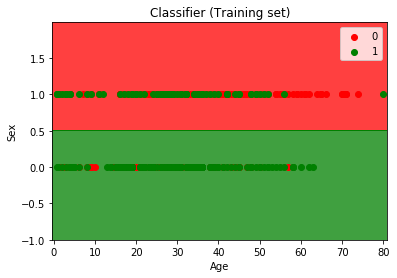

In [23]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend()
plt.show()

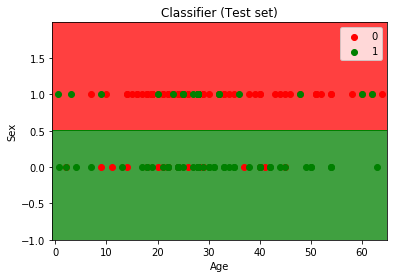

In [24]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend()
plt.show()

Naive Bayes Algorithm steps:
    1. Convert the data set into a frequency table
    2. Create Likelihood table by finding the probabilities
    3. use Naive Bayesian equation to calculate the posterior probability for each class


In [48]:
#Use naive baiyes classification
from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(X_train, y_train)

GaussianNB(priors=None)

In [49]:
y_pred_naive = classifier_naive.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_naive)

In [51]:
cm

array([[92, 18],
       [20, 49]], dtype=int64)

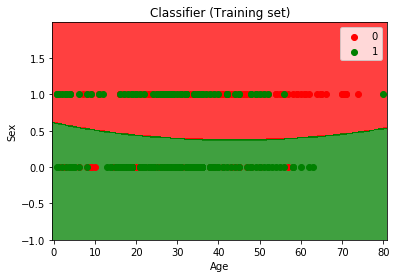

In [43]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_naive.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend()
plt.show()

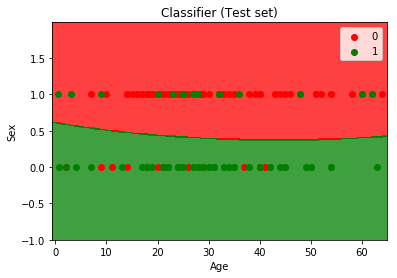

In [44]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_naive.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend()
plt.show()

In [52]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier_decisiontree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [53]:
y_pred_decisiontree = classifier_decisiontree.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_decisiontree)

In [55]:
cm

array([[94, 16],
       [22, 47]], dtype=int64)

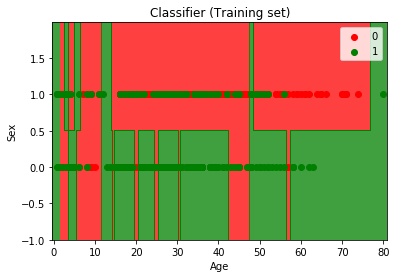

In [56]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_decisiontree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend()
plt.show()

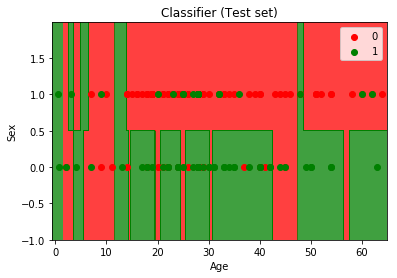

In [57]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_decisiontree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend()
plt.show()

In [59]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier 
classifier_randomforest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=0)
classifier_randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
y_pred_randomforest = classifier_randomforest.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_randomforest)

In [62]:
cm

array([[94, 16],
       [22, 47]], dtype=int64)

In [65]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier 
classifier_randomforest_g = RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state=0)
classifier_randomforest_g.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
y_pred_randomforest_g = classifier_randomforest_g.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_randomforest_g)

In [68]:
cm

array([[94, 16],
       [22, 47]], dtype=int64)